# Linear Regression

### Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

### Loading Data

The Data files are uploaded in the Colab hence the file paths are as such.
Before executing the code make sure the files have been uploaded and be sure to check that they are in the same directory else replace the directory with the location where you uploaded the data. 

__*NOTE: The data is uploaded on GitHub*__

In [4]:
training_data = pd.read_csv('/content/train.csv') #change the directory as per needed
test_data = pd.read_csv('/content/test.csv') #change the directory as per needed

The methods `head()`, `info()`, `desribe()` are used to study the cntents of the datasets.

In [5]:
training_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


The `head()` method gives us the first 5 rows of the dataset. Giving a integer value to this method displays that many number of rows.

Alternatively you can use the method `tail()` to view the last 5 rows.

Example: `head(25)` will display the first 25 rows

In [6]:
training_data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


The `describe()` method gives a breif description of the dataset such as the count, mean standard deviation, min and max value etc.

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


The `info()` method gives the information of what kind of data is stored in the dataset

As we saw in `training_data.info()` the column y has 1 value less this will produce a NaN error while training the model. To overcome this we will be using the `dropna()` method which removes the row where there is a NaN or Null value.

In [8]:
training_data = training_data.dropna()

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Now we can see that there are two columns in the data x and y.

x is the feature and y is the label. You can seperate the features and labels using the following code.

In [10]:
X_train = training_data.iloc[:,0].values
y_train = training_data.iloc[:,1].values

### Visulaizing the Data

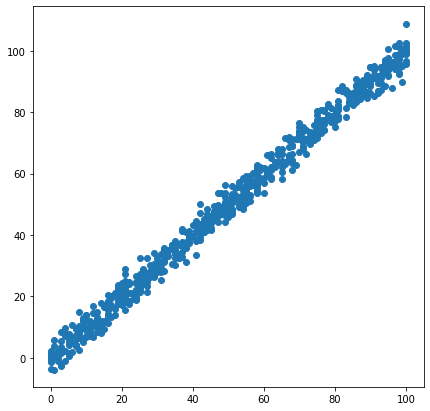

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(X_train,y_train)

### Creating the Model

To model Linear Regression we will be making use of a library know as sci-kit learn. The library provides us with various models for Machine Learning and also provides optimization and evaluation tools for the same (These were imported at the start of the code).

The below line imports the Linear Regression Model into the code

In [12]:
from sklearn.linear_model import LinearRegression

To train the model we first create an instance of the model in our case it is `lr`. We then fit our data to this model using the `fit` or `fit_generator` methods.

The `fit` method gives an error `ValueError: Expected 2D array, got 1D array instead:`when there is only 1 feature so to rectify it we reshape this data by using `X_train.reshape(-1,1)` instead of just `X_train`

In [14]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now for evaluating our model we will give it data which it has not seen before. This is our Testing data

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [16]:
X_test = test_data.iloc[:,0].values
y_test = test_data.iloc[:,1].values

the `score` method gives us on accuracy score of the model by comparing the models output with the labels `y_test`

In [17]:
lr.score(X_test.reshape(-1,1),y_test)

0.9888014444327563